In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
# data = pd.read_csv('./turning_radius_rudder.csv')
data = pd.read_csv('./turning_radius_all.csv')
data.drop(data.index[:105], inplace=True)

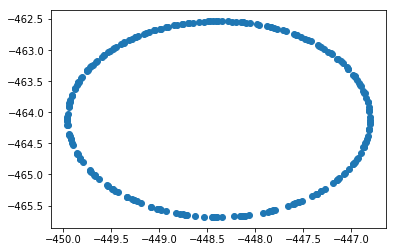

In [46]:
plt.scatter(data.x, data.z)
plt.show()

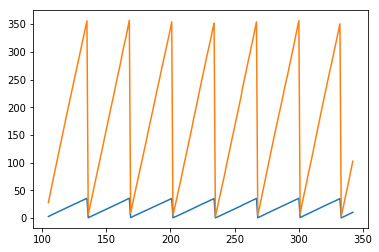

In [47]:
plt.plot(data.yawrate)
plt.plot(data.rot)
plt.show()

In [48]:
from scipy import optimize

x = data.x
y = data.z

x_m = np.mean(x)
y_m = np.mean(y)

def calc_R(xc, yc):
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f(c):
    Ri = calc_R(*c)
    return Ri - Ri.mean()

center_estimate = x_m, y_m
center, ier = optimize.leastsq(f, center_estimate)

xc, yc = center
Ri       = calc_R(*center)
R        = Ri.mean()
residu   = sum((Ri - R)**2)

print R, xc, yc

1.57615949467 -448.378466912 -464.10890606


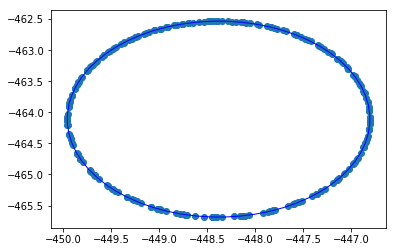

In [34]:
plt.scatter(x, y)

fitted = plt.Circle((xc, yc), R, color='b', fill=False)
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(fitted)

plt.show()